In [1]:
#Math Part
import numpy as np
import pandas as pd

#Graph
import matplotlib.pyplot as plt

import importlib
import circuit
import encoding
import qsvm
import fitness
import gsvm
importlib.reload(circuit)
importlib.reload(encoding)
importlib.reload(qsvm)
importlib.reload(fitness)
importlib.reload(gsvm)

import pandas as pd
import time

In [13]:
from qiskit.circuit import ParameterVector, QuantumCircuit, Parameter
from qiskit import execute, Aer, IBMQ, QuantumRegister, ClassicalRegister, BasicAer

def coding_bits(b):
    c = [b[n:n+5] for n,i in enumerate(b) if n%5==0]
    c_p=[]
    coding_0=[]
    for i in range(len(c)):
        for j in c[i]:
            c_p.append(str(j))
    np.asarray(c_p)
    c = [c_p[n:n+5] for n,i in enumerate(c_p) if n%5==0]
    for i in c:
        coding_0.append(''.join(i))
    return coding_0

In [14]:
class CircuitConversor:

    def __init__(self, nqubits, nparameters):
        gates = {}
        for n, suffix in enumerate(['00','01','10','11']):
            angle = np.pi / (2**n)
            gates['000'+suffix] = (self.make_H(), 1.0)
            gates['001'+suffix] = (self.make_cx(), 2.0)
            gates['010'+suffix] = (self.make_id(), 0.0)
            gates['011'+suffix] = (self.make_rx(angle), 1.0)
            gates['100'+suffix] = (self.make_rz(angle), 1.0)
            gates['101'+suffix] = (self.make_id(), 0.0)
            gates['110'+suffix] = (self.make_id(), 0.0)
            gates['111'+suffix] = (self.make_ry(angle), 1.0)
        self.gates = gates
        self.nqubits = nqubits
        self.register = QuantumRegister(nqubits, 'q')
        self.nparameters = nparameters
        self.nqubits = nqubits
        self.x = ParameterVector('x', nparameters)

    def __call__(self, coding_0):
        print(coding_0)
        circuit = QuantumCircuit(self.register)
        k = 0
        cost = 0
        for ndx, z in enumerate(coding_0):
            qubit = ndx % self.nqubits
            target = (ndx + 1) % self.nqubits
            fn, weight = self.gates[z]
            k = fn(circuit, k, qubit, target)
            cost += weight
        for i in range(k, self.nparameters):
            circuit.rz(self.x[i]*0, self.register[0])
        return circuit, cost

    def make_id(self):
        def operation(circuit, k, qubit, target):
            return k
        return operation

    def make_H(self):
        def operation(circuit, k, qubit, target):
            circuit.h(self.register[qubit])
            return k
        return operation

    def make_cx(self):
        def operation(circuit, k, qubit, target):
            circuit.cx(self.register[qubit], self.register[target])
            return k
        return operation

    def make_rx(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rx(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_ry(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.ry(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

    def make_rz(self, angle):
        def operation(circuit, k, qubit, target):
            circuit.rz(self.x[k%self.nparameters] * angle,
                       self.register[qubit])
            return k+1
        return operation

In [27]:
def evol(output="sample_iot_result_n5.csv"):
    iot_data = pd.read_csv('bank_cleaned_pretest.csv').iloc[:400]
    y = iot_data['y'].values
    X = iot_data[['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']].values
    start = time.time()
    pop, pareto, logbook = gsvm.gsvm(nqubits=6, depth=4, nparameters=5,
                                     X=X, y=y, weights=[-1.0,1.0],
                                     mu=50,lambda_=10, ngen=500)
    print(f'Simulation finished after {time.time()-start} seconds')
    print(f'\nGenetic-algorithm output ({output})')
    print('---------------------------------------------')
    with open(output, "w") as f:
        for ide, ind in enumerate(pareto):
            genes=''.join(str(i) for i in list(ind))
            gates, acc = ind.fitness.values
            line = f'{ide},"{genes}",{gates},{acc}'
            f.write(line)
            f.write('\n')
            print(line)
evol()

multi
String: 11100100111101001011011001111101110000011101011100100100100100100101001111011010
 -> accuracy = 0.975, gates = 11.0
String: 11000100100011001100001101110010001100001010010100000011110101010011100100000111
 -> accuracy = 0.975, gates = 14.0
String: 11011011001000001010111100111101100010101110110000011110010011000110110111111011
 -> accuracy = 0.975, gates = 11.0
String: 01000111010111111101110110100101110101111000010101111100010001101100001000011000
 -> accuracy = 0.975, gates = 11.0
String: 10100001100001111001000011010111001100011100100101110110011001011100110000101011
 -> accuracy = 0.975, gates = 11.0
String: 01011110011101110001100111001100110000011111101110001011010111000011111111111101
 -> accuracy = 0.975, gates = 13.0
String: 11011111101000001000011111110111011000001111101110110001111111000001111110101001
 -> accuracy = 0.975, gates = 11.0
String: 00111011000010110101011000011001011101011010000010100111101101111110011111010000
 -> accuracy = 0.975, gates = 13.0
St

D:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
D:\Anaconda\envs\qc\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


String: 10011011101111001101101101110010011010010111111001111000011001000001110100010110
 -> accuracy = 0.975, gates = 12.0
String: 00001111000010110000011011101100010010010110110100111110010011001111011010001001
 -> accuracy = 0.975, gates = 12.0
String: 10111010111001010010000110011000110111011011111101000101111010100101100010111010
 -> accuracy = 0.975, gates = 13.0
String: 11011100101000110000010000001110111100000110011101010100011101100011110110011101
 -> accuracy = 0.975, gates = 13.0
String: 01100111101000001110100001000110100111011110011011100111011111010010110010101101
 -> accuracy = 0.975, gates = 12.0
String: 10000010000000100111010111011011011000011101101110100001000001011111111110100100
 -> accuracy = 0.975, gates = 12.0
String: 11111111101111000011010010101101001011010001010100101111010101111011011110011010
 -> accuracy = 0.975, gates = 9.0
String: 11101011011000011010110101101101100011100101001000000011011001010011001110111111
 -> accuracy = 0.975, gates = 9.0
String: 00

In [30]:
import encoding2 as e2
import random

iot_result = pd.read_csv('sample_iot_result_n5.csv',header=None)

def ordenar_salidas_pareto(dataframe):
    dataframe.columns=['ind','circ','gates','acc']
    dataframe.sort_values(['acc','gates'], ascending=[False,False],inplace=True)
    dataframe.reset_index(inplace=True)
    dataframe.pop('index')
    return dataframe

iot_salidas = ordenar_salidas_pareto(iot_result)
iot_salidas # Queremos ver el primer circuito del dataframe yya ordenado por accuracy (mejor ind)

,ind,circ,gates,acc
0,0,1010010100110111100011001110011100010100101001...,0.0,0.975
1,1,1011010100110000100011001110010100011000101001...,0.0,0.975
2,2,1011010100110110100011001110011100010110101001...,0.0,0.975
3,3,1011010100110100100011001110011100010100101001...,0.0,0.975
4,4,1010010100110000100011001110011100010110101001...,0.0,0.975
...,...,...,...,...
1483,1483,1010010100110110100011001010001011010100110001...,0.0,0.975
1484,1484,1011010100110001101011001110011100010100101001...,0.0,0.975
1485,1485,1011010100110001101011001110011100010100101001...,0.0,0.975
1486,1486,1011010100110110100011001010001011010100110011...,0.0,0.975


['10100', '10100', '11011', '11000', '11001', '11001', '11000', '10100', '10100', '11010', '01011', '10100', '01001', '11001', '11000', '11000']
0.0


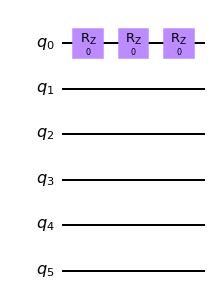

In [29]:
cc = CircuitConversor(nqubits=6, nparameters=3)
fm, puertas = cc(coding_bits(iot_salidas.circ[0]))
print(puertas)
fm.draw(output='mpl')